In [1]:
# Import libraries
import matplotlib.pyplot as plt # Matplotlib is used for plotting
import pandas as pd             # Pandas helps organize data structures
import numpy as np
import statsmodels.formula.api as smf  # Statsmodel provides linear regression

In [2]:
import statsmodels

In [5]:
data=pd.read_csv('HW2_climate.csv')

# Create a binary variable with values 0 or 1, encoding whether the mean temp is > 5.7
data['HighTemp'] = 0;
data.loc[data['Temp']>5.7,'HighTemp'] = 1;
data.head()

,Unnamed: 0,YEAR,Temp,Wet,Cloud,HighTemp
0,0,1901,5.0,110.5,54.7,0
1,1,1902,5.4,110.1,54.6,0
2,2,1903,5.2,111.1,54.9,0
3,3,1904,4.6,110.8,54.7,0
4,4,1905,5.1,111.1,55.0,0


In [23]:
# Example of how to define subsets of a data frame

# Create a smaller dataframe with the first 6 rows
n = 6
data_example = data[0:n] 

# Define test and train vectors
test = [ i<n*0.5 for i in range(n)]
test = np.random.permutation(test)
train = [ (not i) for i in test]

print(test)
print(train)
print(data_example[train])
print(data_example[test])

[False  True  True False  True False]
[True, False, False, True, False, True]
   Unnamed: 0  YEAR  Temp    Wet  Cloud  HighTemp
0           0  1901   5.0  110.5   54.7         0
3           3  1904   4.6  110.8   54.7         0
5           5  1906   5.0  112.0   55.0         0
   Unnamed: 0  YEAR  Temp    Wet  Cloud  HighTemp
1           1  1902   5.4  110.1   54.6         0
2           2  1903   5.2  111.1   54.9         0
4           4  1905   5.1  111.1   55.0         0


In [29]:
train_error = []
test_error = []
test_fraction = 0.5;
n = data.shape[0]
mse_test = list()
mse_train = list()
for j in range(100):  # Loop over the number of iterations of splitting
    
    #  Create a logical vector (true/false) that splits the data into
    # training and testing sets
    test = [ (i<n*test_fraction) for i in range(n)]
    test = np.random.permutation(test)
    
    # Define the training set as the data points which are not testing
    train = [ (not i) for i in test];

    # Train logistic regression using the training data
    mdl=smf.logit(formula='HighTemp ~ 1 + YEAR + Wet', data=data[train]).fit(disp=0);
    
    # Test the predictions
    yhat = mdl.predict(data[test])
    current_mse = np.mean( np.square(data['HighTemp'][test] - yhat) ) 
    mse_test.append( current_mse )
    
    # Test the predictions
    current_mse = np.mean( np.square(data['HighTemp'][train] - mdl.predict(data[train])) ) 
    mse_train.append( current_mse )
    
    

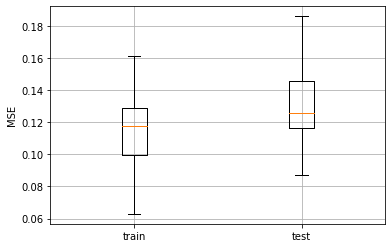

In [39]:
# Make a histogram showing the MSE for test data
# plt.hist(mse_test);
# plt.hist(mse_train);
plt.boxplot([mse_train, mse_test],labels = ['train','test']);
plt.ylabel('MSE')
plt.grid(True)